<table align="left" width=100%>
    <tr>
        <td width="10%">
            <img src="title.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b>IMDB Reviews Sentimental Analysis
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Import libraries

In [77]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

import os

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score



In [13]:
#installed wordcloud,spacy,textblob using !pip install

# Read the data

In [96]:
os.chdir(r'C:\Users\User\Downloads\IMDB Dataset.csv')

In [97]:
imdb_data=pd.read_csv('IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [98]:
imdb_data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [99]:
#sentiment count
imdb_data['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [48]:
#checking null values

missing_values=imdb_data.isnull().sum()
missing_values


review       0
sentiment    0
dtype: int64

There are no missing valures present in the data

# Data Preprocessing 

## Preprocessing to be done on 10,000 reviews

In [49]:
#splitting the dataset into test and train set for further process 

#fetching first 10,000 elements for train set
train_reviews=imdb_data.review[:10000]
train_sentiments=imdb_data.sentiment[:10000]


test_reviews=imdb_data.review[40000:]
test_sentiments=imdb_data.sentiment[40000:]

print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(10000,) (10000,)
(10000,) (10000,)


In [50]:
#Tokenization
#splitting the sentence into individual words 
#The tok-tok tokenizer is a simple, general tokenizer, where the input has one sentence per line.

tokenizer=ToktokTokenizer()

In [51]:
#check the list of stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

### Stopwords are the words which do not contain any significance

In [53]:
#setting stopwords

stop=set(stopwords.words('english'))
print(stop)


{'t', "aren't", 'a', 'i', 'themselves', 'yourselves', 'who', "shan't", 'yours', "wouldn't", 'of', "hasn't", 'doing', 'aren', 'had', 'you', 'when', "you've", 'very', 'he', 'what', 'me', 'how', "it's", "couldn't", 'our', 've', "hadn't", "don't", 'weren', 'wasn', 'is', 'where', 'over', 'now', 'those', "didn't", 'with', 'further', 'there', 'most', "doesn't", 'won', 'whom', 'for', 'below', 'than', 'out', 'on', 'nor', 'couldn', 'as', 'about', 'against', 'then', 'once', 'shan', 'both', 'don', 'under', 'such', 'why', 'which', 'the', 'own', 'just', "mightn't", "won't", 'here', 'have', 'shouldn', 'her', 'hadn', 'hers', 's', 'myself', 'should', 'its', "mustn't", 'again', 'same', "you'll", 'each', "wasn't", 'but', 'being', 'more', 'an', 'not', 'off', 'up', 'at', 'has', 'that', 'did', 'ourselves', 'during', 'd', 'm', 're', 'itself', 'in', 'wouldn', 'she', 'his', 'before', 'haven', 'mustn', 'mightn', 'their', 'other', 'between', 'from', 'because', 'isn', 'your', 'having', "should've", 'him', 'above'

In [54]:
#Remove the html strips
#beautifulsoup- used for web scraping purposes to pull the data out of HTML and XML files

def strip_html(text):
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text()

#Remove the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]','', text)

#Remove the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(denoise_text)

In [57]:
#remove special characters

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_special_characters)

# Stemming

In [58]:
#create base form of the word

def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(simple_stemmer)

In [59]:
#removing the stopwords

stopword_list=nltk.corpus.stopwords.words('english')
def remove_stopwords(text,is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens =[token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens =[token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

#Apply function on review column
imdb_data['review']=imdb_data['review'].apply(remove_stopwords)

In [61]:
norm_train_reviews=imdb_data.review[:10000]
norm_train_reviews[1]

'wonder littl product film techniqu unassum oldtimebbc fashion give comfort sometim discomfort sens realism entir piec actor extrem well chosen michael sheen got polari voic pat truli see seamless edit guid refer william diari entri well worth watch terrificli written perform piec master product one great master comedi life realism realli come home littl thing fantasi guard rather use tradit dream techniqu remain solid disappear play knowledg sens particularli scene concern orton halliwel set particularli flat halliwel mural decor everi surfac terribl well done'

In [62]:
norm_test_reviews=imdb_data.review[40000:]
norm_test_reviews[48400]

'rare film probabl least known shirley templ collectionsth reason probabl happi end unlik filmsit also music although belt one song call world owe live film made 1934 origin black white version colour vh would say done fine job colour look realist unlik would say colouris film laurel hardi dreadfulth film good age stori date surpris one tri remakeat time film littl bit talki scene gari cooper carol lombard seem realli drag scene seem take fifteen minut say could said fivealthough put film genuin good moment especi jerri gari cooper steal necklac hide shirley teddi bearth tension slow build action time daughter sing audienc anoth room well directedgari carol edgi facial express put scrutini also goodin good film earli 30 accept age'

## Bag Of Words-describes the occurrence of words within a document.

In [66]:
cv=CountVectorizer()
cv_train_reviews=cv.fit_transform(norm_train_reviews)
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)


BOW_cv_train: (10000, 56355)
BOW_cv_test: (10000, 56355)


### TFIDF Vectorizer -Term Frequency is how often a word appears within a document & Inverse Document Frequency 

In [67]:
tv=TfidfVectorizer()
tv_train_reviews=tv.fit_transform(norm_train_reviews)
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (10000, 56355)
Tfidf_test: (10000, 56355)


In [68]:
#Labelling the sentimental data
lb=LabelBinarizer()
sentiment_data=lb.fit_transform(imdb_data['sentiment'])
print(sentiment_data.shape)

(50000, 1)


In [69]:
#splitting the sentiment data into train and test

train_sentiments=sentiment_data[:10000]
test_sentiments=sentiment_data[40000:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [1]]
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


## Training model with Logistic Regression

In [72]:
lr=LogisticRegression(random_state=42)

#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments)
print(lr_bow)

#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments)
print(lr_tfidf)

LogisticRegression(random_state=42)
LogisticRegression(random_state=42)


In [73]:
#predicting the model

lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)


lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[0 0 0 ... 1 0 0]
[0 0 0 ... 1 0 0]


In [74]:
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)

#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.8582
lr_tfidf_score : 0.8744


# The accuracy score for the model(bow) achieved is 85% & 87% fo tfid, which is excellent. Hence , let's take it as a best fit model and can be used for further predictions to classify data fed into it.

In [75]:
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.86      0.85      0.86      4993
    Negative       0.85      0.87      0.86      5007

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

              precision    recall  f1-score   support

    Positive       0.88      0.86      0.87      4993
    Negative       0.87      0.89      0.88      5007

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



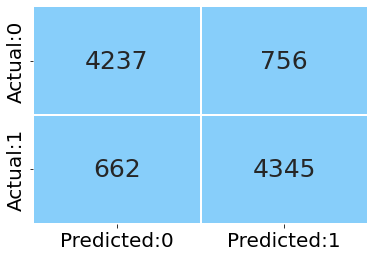

In [78]:
#confusion matrix for bow

cm = confusion_matrix(test_sentiments,lr_bow_predict)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

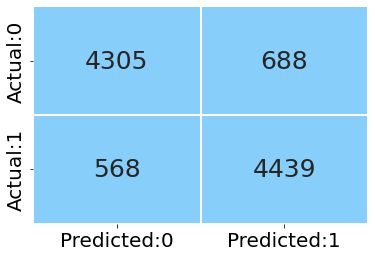

In [79]:
#confusion matrix for tfidf

cm = confusion_matrix(test_sentiments,lr_tfidf_predict)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

# Insights using various visualization

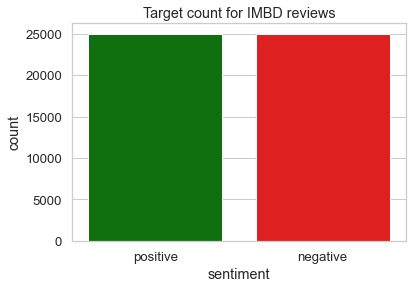

In [100]:
#converting target variable to numeric labels
imdb_data.sentiment =[ 1 if each == "positive" else 'negative' for each in imdb_data.sentiment]

#using count plot to visualize the values in each column
sns.set(style ="whitegrid",font_scale = 1.2)
sns.countplot(imdb_data.sentiment,palette = ['green','red'])
plt.xticks(ticks = np.arange(2),labels = ['positive','negative'])
plt.title('Target count for IMBD reviews')
plt.show()

### The data looks balanced on both the values

<function matplotlib.pyplot.show(close=None, block=None)>

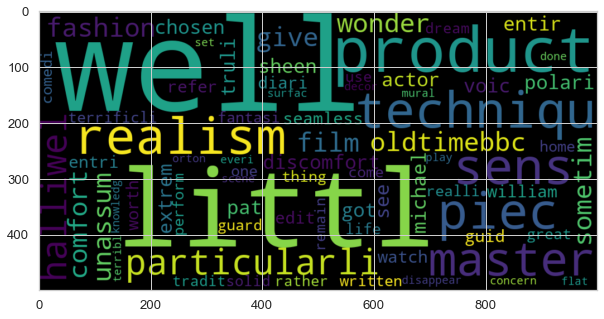

In [101]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

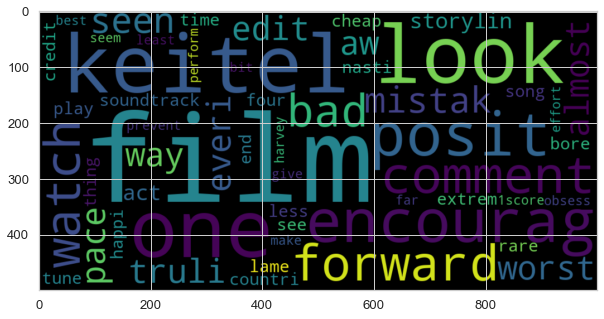

In [102]:
#word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show